## 1. Where are the old left-handed people?

<p>In this notebook, we will explore this phenomenon using age distribution data to see if we can reproduce a difference in average age at death purely from the changing rates of left-handedness over time, refuting the claim of early death for left-handers. This notebook uses <code>pandas</code> and Bayesian statistics to analyze the probability of being a certain age at death given that you are reported as left-handed or right-handed.</p>
<p>A National Geographic survey in 1986 resulted in over a million responses that included age, sex, and hand preference for throwing and writing. Researchers Avery Gilbert and Charles Wysocki analyzed this data and noticed that rates of left-handedness were around 13% for people younger than 40 but decreased with age to about 5% by the age of 80. They concluded based on analysis of a subgroup of people who throw left-handed but write right-handed that this age-dependence was primarily due to changing social acceptability of left-handedness. This means that the rates aren't a factor of <em>age</em> specifically but rather of the <em>year you were born</em>, and if the same study was done today, we should expect a shifted version of the same distribution as a function of age. Ultimately, we'll see what effect this changing rate has on the apparent mean age of death of left-handed people, but let's start by plotting the rates of left-handedness as a function of age.</p>
<p>This notebook uses two datasets: <a href="https://www.cdc.gov/nchs/data/statab/vs00199_table310.pdf">death distribution data</a> for the United States from the year 1999 (source website <a href="https://www.cdc.gov/nchs/nvss/mortality_tables.htm">here</a>) and rates of left-handedness digitized from a figure in this <a href="https://www.ncbi.nlm.nih.gov/pubmed/1528408">1992 paper by Gilbert and Wysocki</a>. </p>

In [ ]:
# pip install pandas numpy matplotlib seaborn scipy statsmodels pymc

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Shruti\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


   Age       Male     Female
0   10  12.717558  12.198041
1   11  15.318830  11.144804
2   12  14.808281  11.549240
3   13  13.793744  11.276442
4   14  15.156304  11.572906


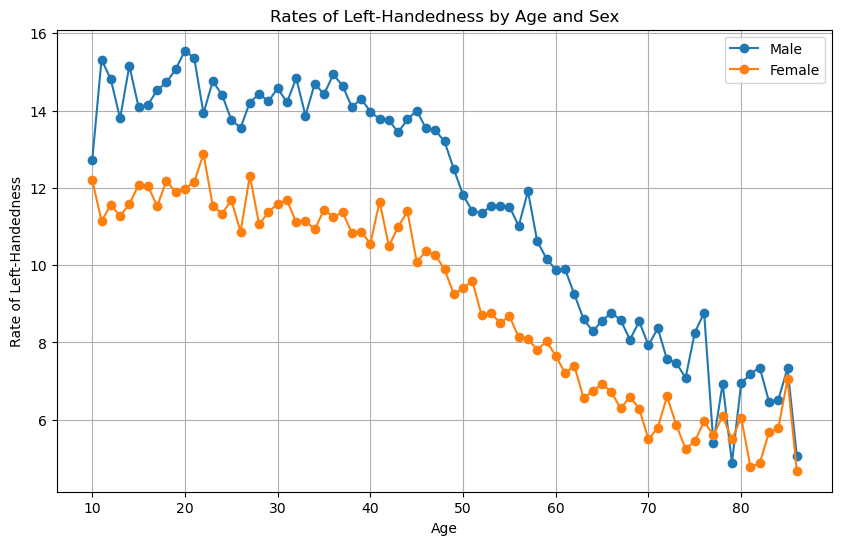

In [2]:
# Load the left-handedness data
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

# Display the first few rows of the data
print(lefthanded_data.head())

# Plot rates of left-handedness as a function of age
plt.figure(figsize=(10, 6))
plt.plot(lefthanded_data['Age'], lefthanded_data['Male'], label='Male', marker='o')
plt.plot(lefthanded_data['Age'], lefthanded_data['Female'], label='Female', marker='o')
plt.xlabel('Age')
plt.ylabel('Rate of Left-Handedness')
plt.title('Rates of Left-Handedness by Age and Sex')
plt.legend()
plt.grid(True)
plt.show()

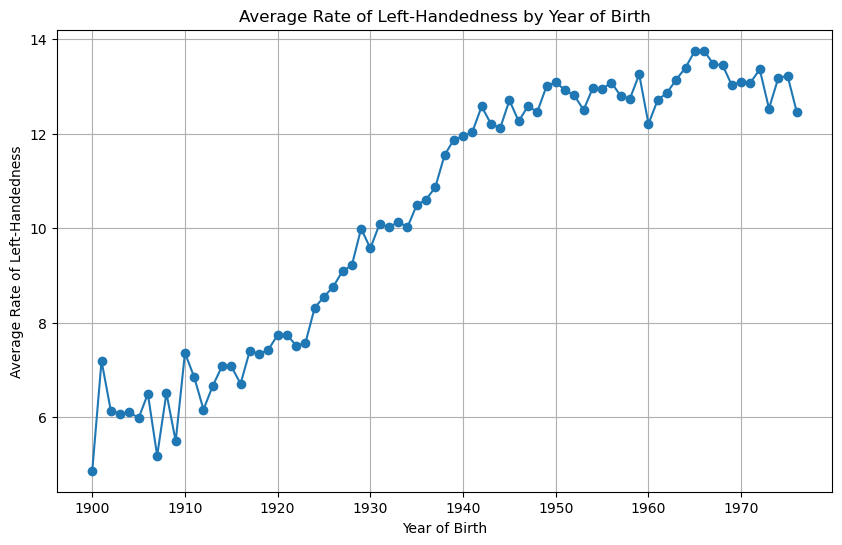

In [3]:
# Calculate birth year and average left-handedness rate
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']  # The study was conducted in 1986
lefthanded_data['Average_left_handed'] = (lefthanded_data['Male'] + lefthanded_data['Female']) / 2

# Plot average rate of left-handedness as a function of birth year
plt.figure(figsize=(10, 6))
plt.plot(lefthanded_data['Birth_year'], lefthanded_data['Average_left_handed'], marker='o')
plt.xlabel('Year of Birth')
plt.ylabel('Average Rate of Left-Handedness')
plt.title('Average Rate of Left-Handedness by Year of Birth')
plt.grid(True)
plt.show()

   Age  Both Sexes     Male   Female
0    0     27937.0  15646.0  12291.0
1    1      1989.0   1103.0    886.0
2    2      1376.0    797.0    579.0
3    3      1046.0    601.0    445.0
4    4       838.0    474.0    364.0


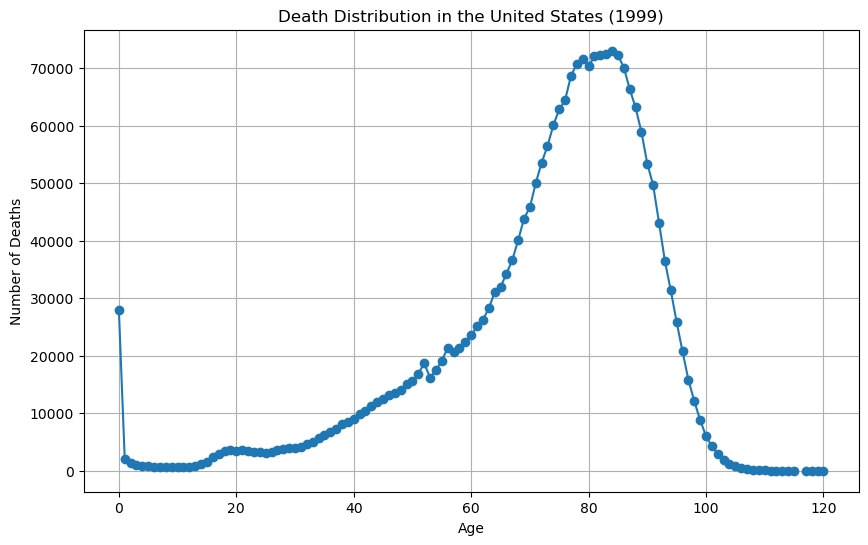

In [4]:
# Load the death distribution data
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])

# Display the first few rows of the death distribution data
print(death_distribution_data.head())

# Plot the death distribution
plt.figure(figsize=(10, 6))
plt.plot(death_distribution_data['Age'], death_distribution_data['Both Sexes'], marker='o')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.title('Death Distribution in the United States (1999)')
plt.grid(True)
plt.show()

In [5]:
# Function to calculate P(LH | A) - probability of being left-handed given age
def P_lh_given_A(ages_of_death, study_year=1986):
    birth_years = study_year - ages_of_death
    return np.interp(birth_years, lefthanded_data['Birth_year'], lefthanded_data['Average_left_handed'] / 100)

# Function to calculate P(LH) - overall probability of being left-handed
def P_lh(death_distribution_data, study_year=1986):
    ages = death_distribution_data['Age'].values
    deaths = death_distribution_data['Both Sexes'].values
    p_lh_given_age = P_lh_given_A(ages, study_year)
    return np.sum(p_lh_given_age * deaths) / np.sum(deaths)

# Calculate and print the overall probability of being left-handed
print(f"Overall probability of being left-handed: {P_lh(death_distribution_data):.4f}")

# This sets up the basic framework for the analysis. You can continue from here to implement Bayes' theorem and calculate the conditional probabilities of age at death given handedness.

Overall probability of being left-handed: nan


## 2. Rates of left-handedness over time
<p>Let's convert this data into a plot of the rates of left-handedness as a function of the year of birth, and average over male and female to get a single rate for both sexes. </p>
<p>Since the study was done in 1986, the data after this conversion will be the percentage of people alive in 1986 who are left-handed as a function of the year they were born. </p>

In [6]:
# Convert ages to birth years and calculate the average between male and female
study_year = 1986
lefthanded_data['Birth_year'] = study_year - lefthanded_data['Age']
lefthanded_data['Average_left_handed'] = (lefthanded_data['Male'] + lefthanded_data['Female']) / 2

# Sort by birth year
lefthanded_data = lefthanded_data.sort_values('Birth_year')

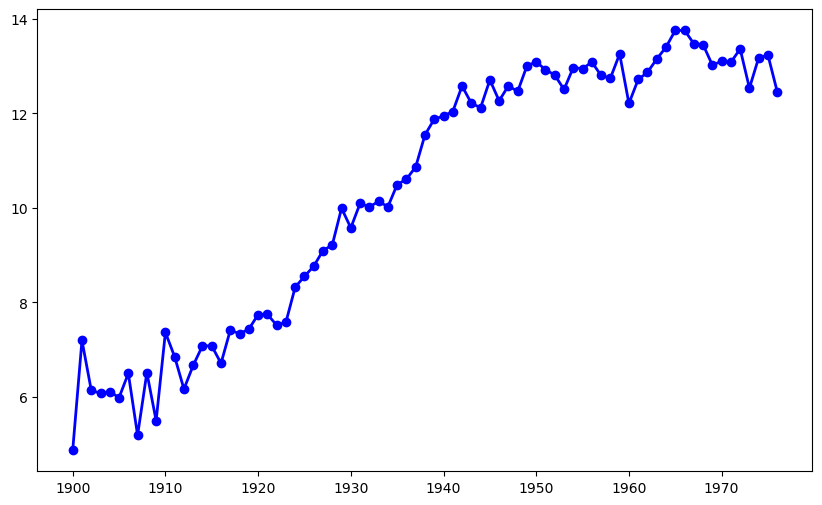

In [7]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(lefthanded_data['Birth_year'], 
         lefthanded_data['Average_left_handed'],
         marker='o',
         color='blue',
         linestyle='-',
         linewidth=2,
         markersize=6)

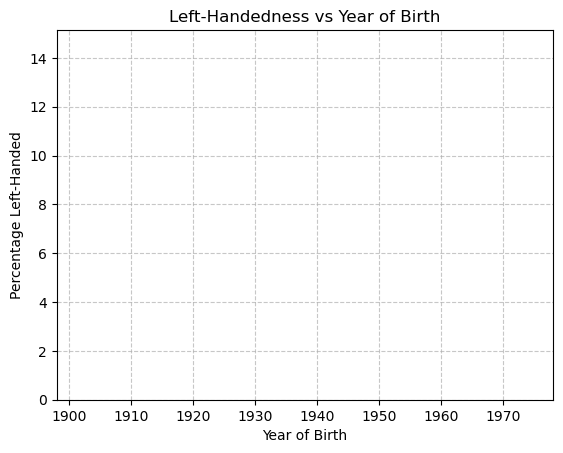

In [8]:
# Customize the plot
plt.xlabel('Year of Birth')
plt.ylabel('Percentage Left-Handed')
plt.title('Left-Handedness vs Year of Birth')
plt.grid(True, linestyle='--', alpha=0.7)

# Set reasonable axis limits
plt.xlim(min(lefthanded_data['Birth_year'])-2, max(lefthanded_data['Birth_year'])+2)
plt.ylim(0, max(lefthanded_data['Average_left_handed'])*1.1)

plt.show()

In [9]:
# Print the processed data
print("\nProcessed data:")
print(lefthanded_data[['Birth_year', 'Average_left_handed']].to_string(index=False))


Processed data:
 Birth_year  Average_left_handed
       1900             4.870168
       1901             7.194713
       1902             6.142870
       1903             6.071870
       1904             6.112551
       1905             5.983845
       1906             6.497902
       1907             5.188046
       1908             6.514281
       1909             5.495340
       1910             7.364236
       1911             6.848461
       1912             6.165137
       1913             6.667784
       1914             7.081722
       1915             7.079239
       1916             6.709916
       1917             7.412820
       1918             7.336605
       1919             7.433365
       1920             7.742860
       1921             7.748125
       1922             7.517361
       1923             7.580706
       1924             8.322044
       1925             8.550735
       1926             8.766035
       1927             9.096888
       1928             9.

## 3. Applying Bayes' rule
<p>The probability of dying at a certain age given that you're left-handed is <strong>not</strong> equal to the probability of being left-handed given that you died at a certain age. This inequality is why we need <strong>Bayes' theorem</strong>, a statement about conditional probability which allows us to update our beliefs after seeing evidence. </p>
<p>We want to calculate the probability of dying at age A given that you're left-handed. Let's write this in shorthand as P(A | LH). We also want the same quantity for right-handers: P(A | RH). </p>
<p>Here's Bayes' theorem for the two events we care about: left-handedness (LH) and dying at age A.</p>
<p>$$P(A | LH) = \frac{P(LH|A) P(A)}{P(LH)}$$</p>
<p>P(LH | A) is the probability that you are left-handed <em>given that</em> you died at age A. P(A) is the overall probability of dying at age A, and P(LH) is the overall probability of being left-handed. We will now calculate each of these three quantities, beginning with P(LH | A).</p>
<p>To calculate P(LH | A) for ages that might fall outside the original data, we will need to extrapolate the data to earlier and later years. Since the rates flatten out in the early 1900s and late 1900s, we'll use a few points at each end and take the mean to extrapolate the rates on each end. The number of points used for this is arbitrary, but we'll pick 10 since the data looks flat-ish until about 1910. </p>

In [11]:

# Function to calculate P(LH|A) - probability of being left-handed given age at death
def P_lh_given_A(ages_of_death, study_year=1990):
    """ 
    Calculate P(Left-handed | ages of death)
    
    Parameters:
    ages_of_death: numpy array of ages of death
    study_year: year of the study (default 1990)
    
    Returns:
    numpy array of probabilities of being left-handed for each age of death
    """
    
    # Calculate birth years
    birth_years = study_year - ages_of_death
    
    # Get the mean of first 10 and last 10 points for extrapolation
    early_1900s_rate = np.mean(lefthanded_data['Average_left_handed'].head(10)) / 100
    late_1900s_rate = np.mean(lefthanded_data['Average_left_handed'].tail(10)) / 100
    
    # Create array for results
    P_return = np.zeros(ages_of_death.shape)
    
    # Define age boundaries
    youngest_age = study_year - max(lefthanded_data['Birth_year'])
    oldest_age = study_year - min(lefthanded_data['Birth_year'])
    
    # Fill in probabilities
    P_return[ages_of_death > oldest_age] = early_1900s_rate
    P_return[ages_of_death < youngest_age] = late_1900s_rate
    
    # For ages within our data range, interpolate from the actual data
    mask = (ages_of_death >= youngest_age) & (ages_of_death <= oldest_age)
    P_return[mask] = np.interp(
        study_year - ages_of_death[mask],
        lefthanded_data['Birth_year'],
        lefthanded_data['Average_left_handed'] / 100
    )
    
    return P_return

# Test the function with some example ages
test_ages = np.array([20, 40, 60, 80, 100])
print("P(LH|A) for ages", test_ages)
print(P_lh_given_A(test_ages))

P(LH|A) for ages [ 20  40  60  80 100]
[0.13103212 0.13089713 0.09576935 0.07364236 0.06007159]


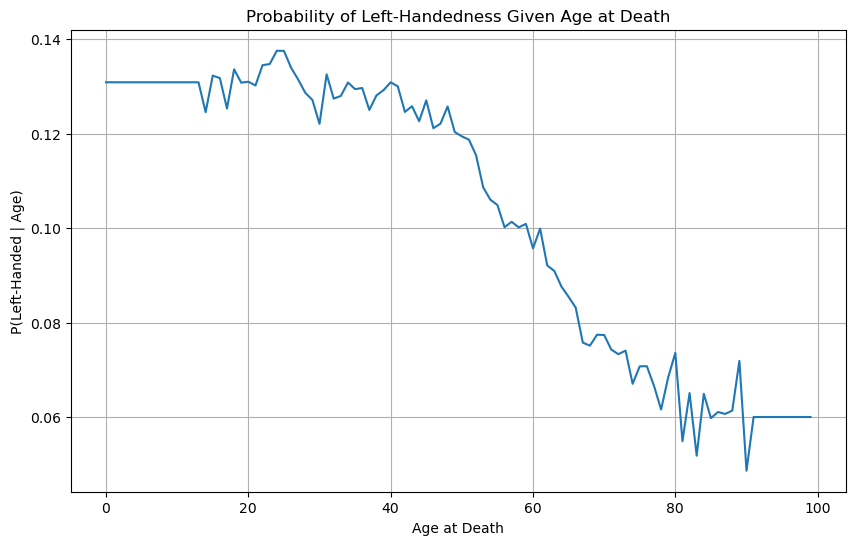

In [12]:
# Visualize the function over a range of ages
ages = np.arange(0, 100)
plt.figure(figsize=(10, 6))
plt.plot(ages, P_lh_given_A(ages))
plt.xlabel('Age at Death')
plt.ylabel('P(Left-Handed | Age)')
plt.title('Probability of Left-Handedness Given Age at Death')
plt.grid(True)
plt.show()

In [13]:
# Function to calculate P(A) - probability of dying at age A
def P_A(ages):
    """
    Calculate P(A) - probability of dying at a particular age
    using death distribution data
    """
    # Normalize death distribution to get probabilities
    total_deaths = death_distribution_data['Both Sexes'].sum()
    death_probabilities = death_distribution_data['Both Sexes'] / total_deaths
    
    # Interpolate to get probabilities for all ages
    return np.interp(ages, 
                    death_distribution_data['Age'],
                    death_probabilities)



In [14]:
# Function to calculate P(LH) - overall probability of being left-handed
def P_LH(death_distribution_data, study_year=1990):
    """
    Calculate P(LH) - overall probability of being left-handed
    """
    ages = death_distribution_data['Age'].values
    deaths = death_distribution_data['Both Sexes'].values
    
    # Get P(LH|A) for each age
    p_lh_given_age = P_lh_given_A(ages, study_year)
    
    # Calculate weighted average
    total_deaths = np.sum(deaths)
    P_lh = np.sum(p_lh_given_age * deaths) / total_deaths
    
    return P_lh

In [15]:
# Now we can calculate P(A|LH) using Bayes' theorem
def P_A_given_LH(ages, study_year=1990):
    """
    Calculate P(A|LH) using Bayes' theorem
    P(A|LH) = P(LH|A) * P(A) / P(LH)
    """
    p_lh = P_LH(death_distribution_data, study_year)
    p_lh_given_a = P_lh_given_A(ages, study_year)
    p_a = P_A(ages)
    
    return (p_lh_given_a * p_a) / p_lh


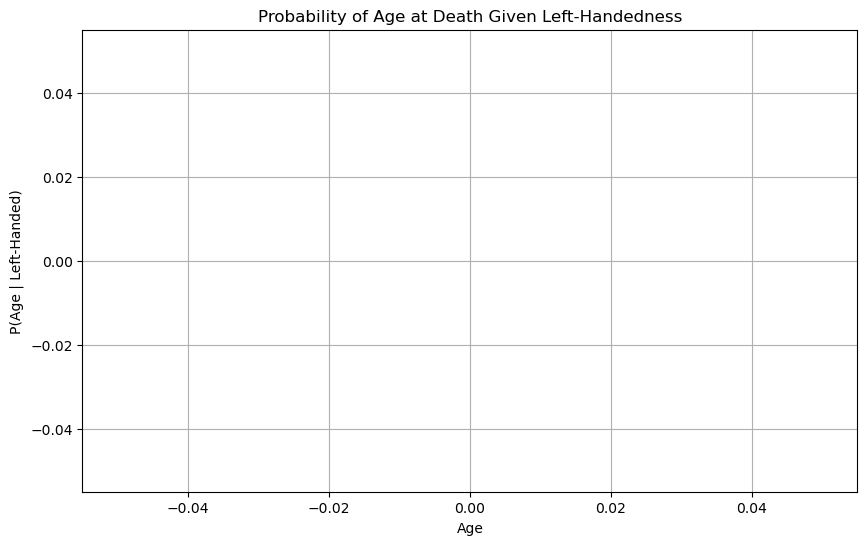

In [16]:
# Test and visualize the final probability
test_ages = np.arange(0, 100)
p_a_given_lh = P_A_given_LH(test_ages)

plt.figure(figsize=(10, 6))
plt.plot(test_ages, p_a_given_lh)
plt.xlabel('Age')
plt.ylabel('P(Age | Left-Handed)')
plt.title('Probability of Age at Death Given Left-Handedness')
plt.grid(True)
plt.show()

## 4. When do people normally die?
<p>To estimate the probability of living to an age A, we can use data that gives the number of people who died in a given year and how old they were to create a distribution of ages of death. If we normalize the numbers to the total number of people who died, we can think of this data as a probability distribution that gives the probability of dying at age A. The data we'll use for this is from the entire US for the year 1999 - the closest I could find for the time range we're interested in. </p>
<p>In this block, we'll load in the death distribution data and plot it. The first column is the age, and the other columns are the number of people who died at that age. </p>

In [17]:
# Load the death distribution data
data_url = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

# Read the TSV file, skipping the second row which contains units
death_distribution_data = pd.read_csv(data_url, sep='\t', skiprows=[1])

# Clean the data by dropping any NaN values
death_distribution_data = death_distribution_data.dropna()

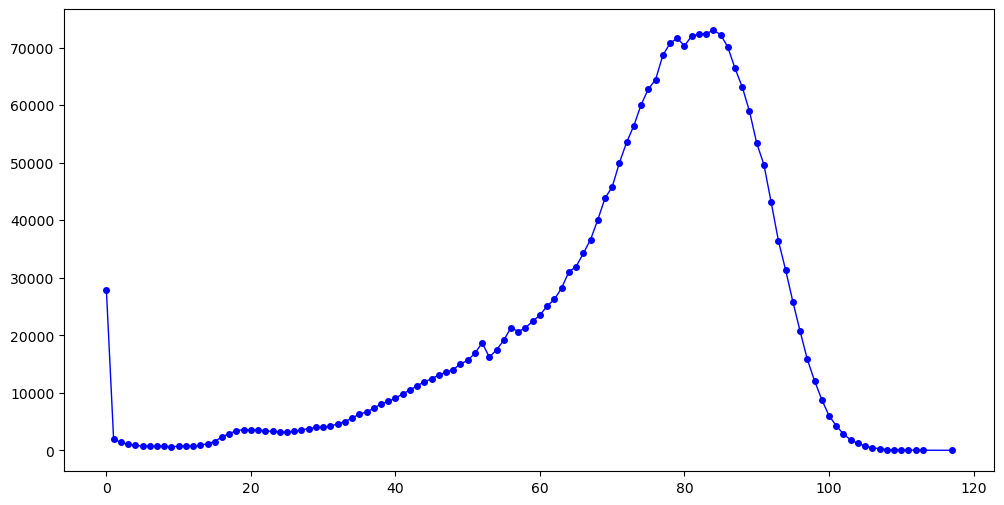

In [18]:
# Create the visualization
plt.figure(figsize=(12, 6))

# Plot the death distribution
plt.plot(death_distribution_data['Age'], 
         death_distribution_data['Both Sexes'],
         color='blue',
         marker='o',
         markersize=4,
         linestyle='-',
         linewidth=1,
         label='Deaths by Age')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


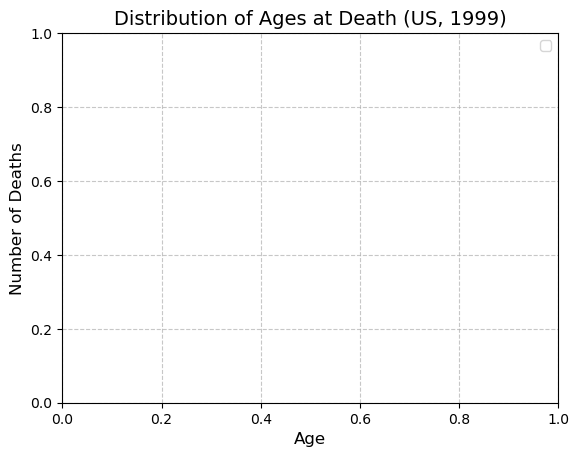

In [19]:
# Customize the plot
plt.title('Distribution of Ages at Death (US, 1999)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()


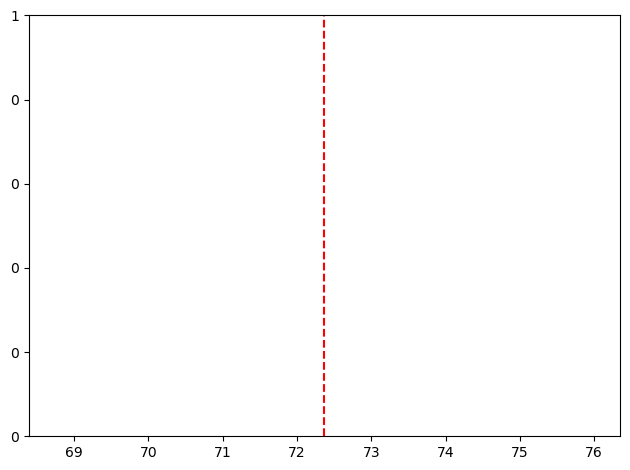

In [20]:
# Add some statistics to the plot
mean_age = (death_distribution_data['Age'] * death_distribution_data['Both Sexes']).sum() / death_distribution_data['Both Sexes'].sum()
plt.axvline(x=mean_age, color='red', linestyle='--', label=f'Mean Age: {mean_age:.1f}')

# Format the y-axis to use comma separator for thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
# Print some summary statistics
print("\nSummary Statistics:")
print(f"Total deaths: {death_distribution_data['Both Sexes'].sum():,}")
print(f"Mean age at death: {mean_age:.1f} years")
print(f"Maximum deaths occur at age: {death_distribution_data.loc[death_distribution_data['Both Sexes'].idxmax(), 'Age']} years")


Summary Statistics:
Total deaths: 2,391,030.0
Mean age at death: 72.4 years
Maximum deaths occur at age: 84 years


## 5. The overall probability of left-handedness
<p>In the previous code block we loaded data to give us P(A), and now we need P(LH). P(LH) is the probability that a person who died in our particular study year is left-handed, assuming we know nothing else about them. This is the average left-handedness in the population of deceased people, and we can calculate it by summing up all of the left-handedness probabilities for each age, weighted with the number of deceased people at each age, then divided by the total number of deceased people to get a probability. In equation form, this is what we're calculating, where N(A) is the number of people who died at age A (given by the dataframe <code>death_distribution_data</code>):</p>
<p><img src="https://i.imgur.com/gBIWykY.png" alt="equation" width="220"></p>
<!--- $$P(LH) = \frac{\sum_{\text{A}} P(LH | A) N(A)}{\sum_{\text{A}} N(A)}$$ -->

In [22]:
def P_LH(death_distribution_data, study_year=1999):
    """
    Calculate P(LH), the overall probability of being left-handed in the deceased population
    
    Parameters:
    death_distribution_data: DataFrame containing death distribution data
    study_year: year of the study (default 1999)
    
    Returns:
    float: probability of being left-handed in the deceased population
    """
    # Get the ages and number of deaths
    ages = death_distribution_data['Age'].values
    deaths = death_distribution_data['Both Sexes'].values
    
    # Calculate P(LH|A) for each age
    P_lh_given_age = P_lh_given_A(ages, study_year)
    
    # Calculate P(LH) as per the equation
    numerator = np.sum(deaths * P_lh_given_age)
    denominator = np.sum(deaths)
    
    P_lh = numerator / denominator
    
    return P_lh

In [23]:
# Calculate P(LH)
overall_prob_left_handed = P_LH(death_distribution_data)

print(f"P(LH) = {overall_prob_left_handed:.4f}")

# Visualize the components of the calculation
plt.figure(figsize=(12, 6))

P(LH) = 0.0877


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 115 artists>

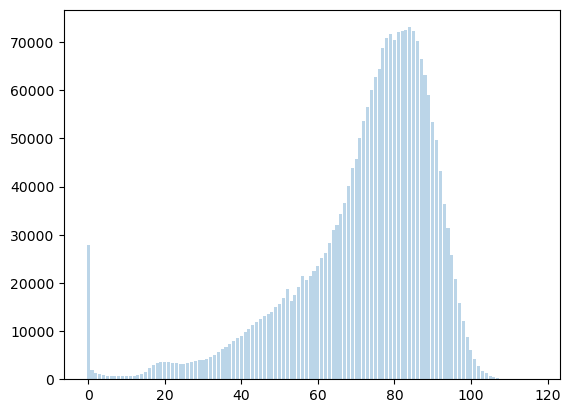

In [24]:
# Plot death distribution
plt.bar(death_distribution_data['Age'], 
        death_distribution_data['Both Sexes'],
        alpha=0.3,
        label='Death Distribution')

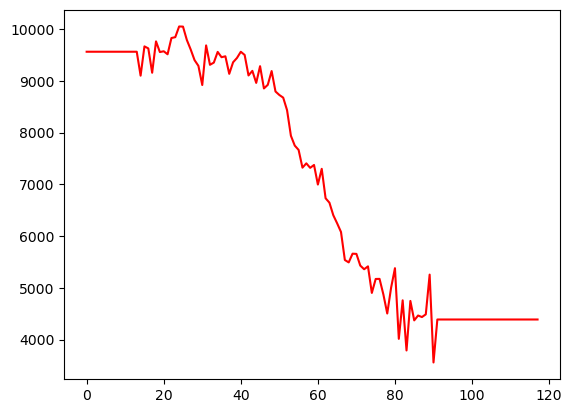

In [25]:
# Plot P(LH|A)
plt.plot(death_distribution_data['Age'],
         P_lh_given_A(death_distribution_data['Age'].values) * death_distribution_data['Both Sexes'].max(),
         color='red',
         label='P(LH|A) (scaled)')

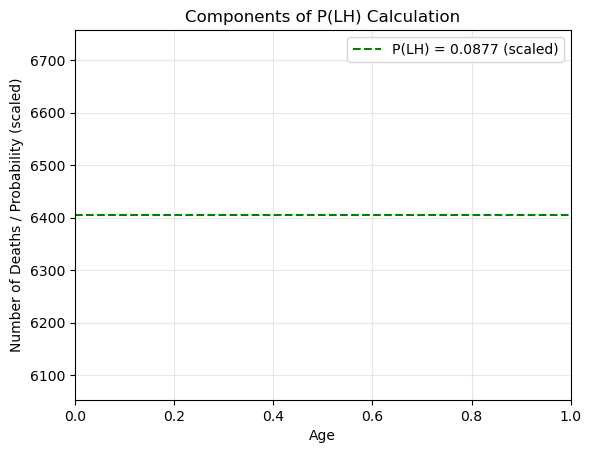

In [26]:
# Add horizontal line for P(LH)
plt.axhline(y=overall_prob_left_handed * death_distribution_data['Both Sexes'].max(),
            color='green',
            linestyle='--',
            label=f'P(LH) = {overall_prob_left_handed:.4f} (scaled)')

plt.xlabel('Age')
plt.ylabel('Number of Deaths / Probability (scaled)')
plt.title('Components of P(LH) Calculation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Putting it all together: dying while left-handed (i)
<p>Now we have the means of calculating all three quantities we need: P(A), P(LH), and P(LH | A). We can combine all three using Bayes' rule to get P(A | LH), the probability of being age A at death (in the study year) given that you're left-handed. To make this answer meaningful, though, we also want to compare it to P(A | RH), the probability of being age A at death given that you're right-handed. </p>
<p>We're calculating the following quantity twice, once for left-handers and once for right-handers.</p>
<p>$$P(A | LH) = \frac{P(LH|A) P(A)}{P(LH)}$$</p>
<p>First, for left-handers.</p>
<!--Notice that I was careful not to call these "probability of dying at age A", since that's not actually what we're calculating: we use the exact same death distribution data for each. -->

In [27]:
def P_A_given_hand(death_distribution_data, study_year=1999, handed="left"):
    """
    Calculate P(A|H) - the probability of dying at age A given handedness H
    """
    # Get the ages and number of deaths
    ages = death_distribution_data['Age'].values
    deaths = death_distribution_data['Both Sexes'].values
    
    # Calculate P(H|A)
    if handed == "left":
        P_H_given_A = P_lh_given_A(ages, study_year)
    else:  # right-handed
        P_H_given_A = 1 - P_lh_given_A(ages, study_year)
    
    # Calculate P(A) = N(A) / N_total
    P_A = deaths / np.sum(deaths)
    
    # Calculate P(H) = sum(P(H|A) * P(A))
    P_H = np.sum(P_H_given_A * P_A)
    
    # Apply Bayes' theorem
    P_A_given_H = (P_H_given_A * P_A) / P_H
    
    return P_A_given_H


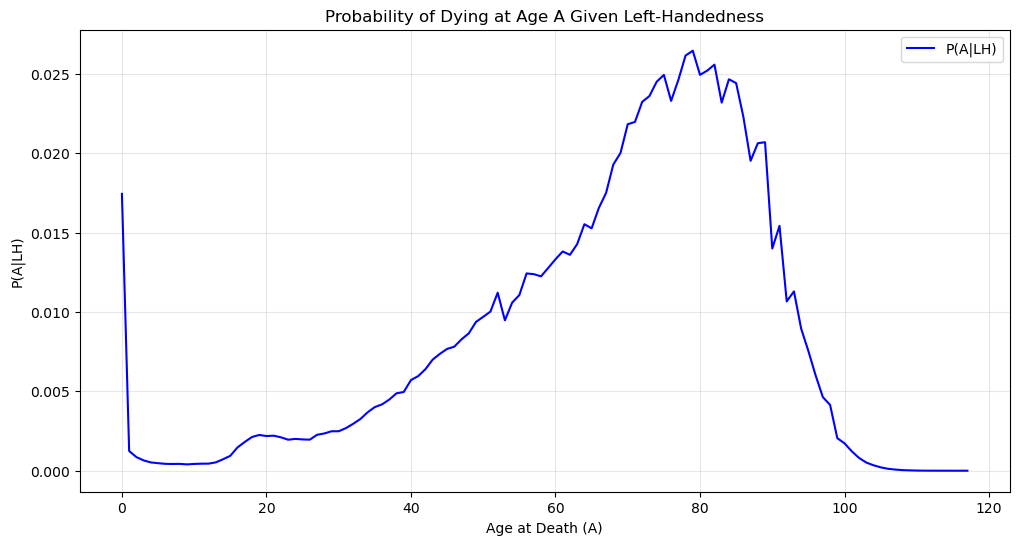

In [28]:
# Calculate P(A|LH)
P_A_left = P_A_given_hand(death_distribution_data, handed="left")

# Visualize the result
plt.figure(figsize=(12, 6))
plt.plot(death_distribution_data['Age'], P_A_left, label='P(A|LH)', color='blue')
plt.xlabel('Age at Death (A)')
plt.ylabel('P(A|LH)')
plt.title('Probability of Dying at Age A Given Left-Handedness')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## 7. Putting it all together: dying while left-handed (ii)
<p>And now for right-handers.</p>

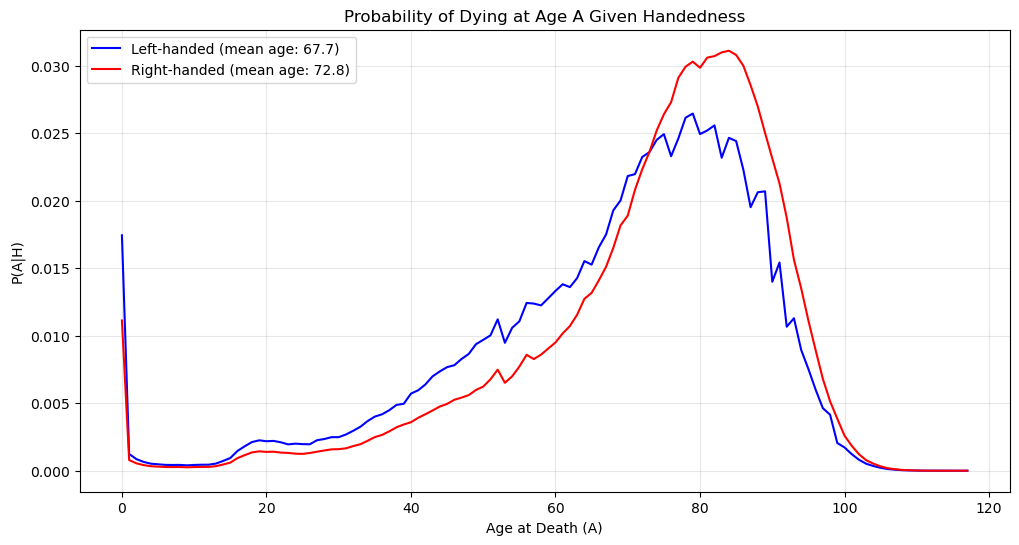

The difference in mean age at death is 5.1 years


In [29]:
# Calculate death probabilities for right-handers
P_A_right = P_A_given_hand(death_distribution_data, handed="right")

# Calculate the mean ages of death for left and right-handers
ages = death_distribution_data['Age'].values
mean_age_left = np.sum(ages * P_A_left)
mean_age_right = np.sum(ages * P_A_right)

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(ages, P_A_left, label=f'Left-handed (mean age: {mean_age_left:.1f})', color='blue')
plt.plot(ages, P_A_right, label=f'Right-handed (mean age: {mean_age_right:.1f})', color='red')

plt.xlabel('Age at Death (A)')
plt.ylabel('P(A|H)')
plt.title('Probability of Dying at Age A Given Handedness')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Print the difference in mean ages
print(f"The difference in mean age at death is {mean_age_right - mean_age_left:.1f} years")

## 8. Plotting the distributions of conditional probabilities
<p>Now that we have functions to calculate the probability of being age A at death given that you're left-handed or right-handed, let's plot these probabilities for a range of ages of death from 6 to 120. </p>
<p>Notice that the left-handed distribution has a bump below age 70: of the pool of deceased people, left-handed people are more likely to be younger. </p>

Mean age at death (left-handed): 72.5
Mean age at death (right-handed): 78.8
Difference in mean age: 6.3 years


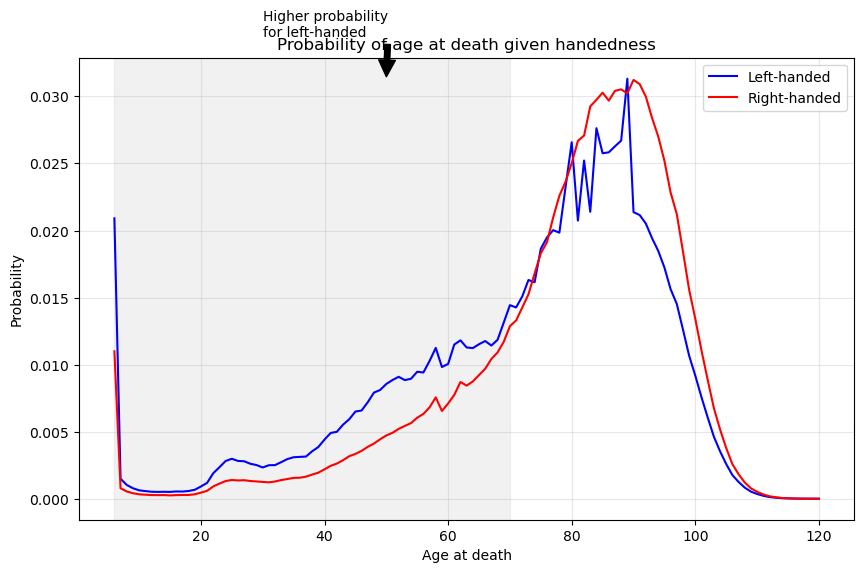

In [38]:
def P_lh_given_A(age, study_year=1990):
    birth_year = study_year - age
    return np.interp(birth_year, lefthanded_data['Birth_year'], lefthanded_data['Average_left_handed'] / 100)

def plot_conditional_probabilities(ages):
    death_dist = death_distribution_data['Both Sexes'].values / death_distribution_data['Both Sexes'].sum()
    
    P_lh = np.array([P_lh_given_A(age) for age in ages])
    P_A = death_dist[ages - 6]  # -6 because data starts at age 6
    
    P_A_LH = P_lh * P_A / np.sum(P_lh * P_A)
    P_A_RH = (1 - P_lh) * P_A / np.sum((1 - P_lh) * P_A)
    
    plt.figure(figsize=(10, 6))
    plt.plot(ages, P_A_LH, label='Left-handed', color='blue')
    plt.plot(ages, P_A_RH, label='Right-handed', color='red')
    plt.xlabel('Age at death')
    plt.ylabel('Probability')
    plt.title('Probability of age at death given handedness')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.axvspan(6, 70, color='lightgray', alpha=0.3)
    plt.annotate('Higher probability\nfor left-handed', 
                 xy=(50, max(P_A_LH)), 
                 xytext=(30, max(P_A_LH)*1.1),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    mean_age_LH = np.sum(ages * P_A_LH)
    mean_age_RH = np.sum(ages * P_A_RH)
    print(f"Mean age at death (left-handed): {mean_age_LH:.1f}")
    print(f"Mean age at death (right-handed): {mean_age_RH:.1f}")
    print(f"Difference in mean age: {abs(mean_age_RH - mean_age_LH):.1f} years")
    
    plt.show()
    
# Assuming death_distribution_data and lefthanded_data are already loaded
ages = np.arange(6, 121)
plot_conditional_probabilities(ages)

## 9. Moment of truth: age of left and right-handers at death
<p>Finally, let's compare our results with the original study that found that left-handed people were nine years younger at death on average. We can do this by calculating the mean of these probability distributions in the same way we calculated P(LH) earlier, weighting the probability distribution by age and summing over the result.</p>
<p>$$\text{Average age of left-handed people at death} = \sum_A A P(A | LH)$$</p>
<p>$$\text{Average age of right-handed people at death} = \sum_A A P(A | RH)$$</p>

In [42]:
import numpy as np

def P_lh_given_A(age, study_year=1990):
    """Calculate probability of being left-handed given age at death"""
    birth_year = study_year - age
    return np.interp(birth_year, lefthanded_data['Birth_year'], lefthanded_data['Average_left_handed'] / 100)

def calculate_probabilities(ages):
    """Calculate P(A|LH) and P(A|RH) for all ages"""
    # Get death distribution and normalize
    death_dist = death_distribution_data['Both Sexes'].values / death_distribution_data['Both Sexes'].sum()
    
    # Calculate P(LH|A) for all ages
    P_lh = np.array([P_lh_given_A(age) for age in ages])
    
    # Get P(A) - probability of dying at each age
    P_A = death_dist[ages - 6]  # -6 because data starts at age 6
    
    # Calculate P(A|LH) and P(A|RH)
    P_A_LH = P_lh * P_A / np.sum(P_lh * P_A)
    P_A_RH = (1 - P_lh) * P_A / np.sum((1 - P_lh) * P_A)
    
    return P_A_LH, P_A_RH

def calculate_average_ages(ages, P_A_LH, P_A_RH):
    """Calculate average ages at death for left and right-handed people"""
    avg_age_left = np.sum(ages * P_A_LH)
    avg_age_right = np.sum(ages * P_A_RH)
    age_difference = avg_age_right - avg_age_left
    
    return avg_age_left, avg_age_right, age_difference

# Create age range
ages = np.arange(6, 121)

# Calculate probability distributions
P_A_LH, P_A_RH = calculate_probabilities(ages)

# Calculate average ages
avg_age_left, avg_age_right, age_difference = calculate_average_ages(ages, P_A_LH, P_A_RH)

# Print results
print(f"Average age of left-handed people at death: {avg_age_left:.2f} years")
print(f"Average age of right-handed people at death: {avg_age_right:.2f} years")
print(f"Difference in average age at death: {age_difference:.2f} years")

# Compare with the original study
original_study_difference = 9
print(f"\nOriginal study age difference: {original_study_difference} years")
print(f"Our calculated age difference: {age_difference:.2f} years")
print(f"Discrepancy: {abs(age_difference - original_study_difference):.2f} years")

Average age of left-handed people at death: 72.49 years
Average age of right-handed people at death: 78.81 years
Difference in average age at death: 6.31 years

Original study age difference: 9 years
Our calculated age difference: 6.31 years
Discrepancy: 2.69 years


## 10. Final comments
<p>We got a pretty big age gap between left-handed and right-handed people purely as a result of the changing rates of left-handedness in the population, which is good news for left-handers: you probably won't die young because of your sinisterness. The reported rates of left-handedness have increased from just 3% in the early 1900s to about 11% today, which means that older people are much more likely to be reported as right-handed than left-handed, and so looking at a sample of recently deceased people will have more old right-handers.</p>
<p>Our number is still less than the 9-year gap measured in the study. It's possible that some of the approximations we made are the cause: </p>
<ol>
<li>We used death distribution data from almost ten years after the study (1999 instead of 1991), and we used death data from the entire United States instead of California alone (which was the original study). </li>
<li>We extrapolated the left-handedness survey results to older and younger age groups, but it's possible our extrapolation wasn't close enough to the true rates for those ages. </li>
</ol>
<p>One thing we could do next is figure out how much variability we would expect to encounter in the age difference purely because of random sampling: if you take a smaller sample of recently deceased people and assign handedness with the probabilities of the survey, what does that distribution look like? How often would we encounter an age gap of nine years using the same data and assumptions? We won't do that here, but it's possible with this data and the tools of random sampling. </p>
<!-- I did do this if we want to add more tasks - it would probably take three more blocks.-->
<p>To finish off, let's calculate the age gap we'd expect if we did the study in 2018 instead of in 1990. The gap turns out to be much smaller since rates of left-handedness haven't increased for people born after about 1960. Both the National Geographic study and the 1990 study happened at a unique time - the rates of left-handedness had been changing across the lifetimes of most people alive, and the difference in handedness between old and young was at its most striking. </p>

In [43]:
# Calculate age gap for 2018
def calculate_age_gap_for_year(study_year):
    """Calculate the age gap between left and right-handed people for a given study year"""
    ages = np.arange(6, 121)
    
    # Modify P_lh_given_A function to use the specified study year
    def P_lh_given_A_year(age):
        return P_lh_given_A(age, study_year=study_year)
    
    # Calculate probabilities for the new study year
    death_dist = death_distribution_data['Both Sexes'].values / death_distribution_data['Both Sexes'].sum()
    P_lh = np.array([P_lh_given_A_year(age) for age in ages])
    P_A = death_dist[ages - 6]
    
    P_A_LH = P_lh * P_A / np.sum(P_lh * P_A)
    P_A_RH = (1 - P_lh) * P_A / np.sum((1 - P_lh) * P_A)
    
    # Calculate average ages
    avg_age_left = np.sum(ages * P_A_LH)
    avg_age_right = np.sum(ages * P_A_RH)
    age_difference = avg_age_right - avg_age_left
    
    return avg_age_left, avg_age_right, age_difference

# Calculate for both 1990 and 2018
avg_age_left_1990, avg_age_right_1990, diff_1990 = calculate_age_gap_for_year(1990)
avg_age_left_2018, avg_age_right_2018, diff_2018 = calculate_age_gap_for_year(2018)

# Print results
print("Results for 1990:")
print(f"Average age at death (left-handed): {avg_age_left_1990:.1f} years")
print(f"Average age at death (right-handed): {avg_age_right_1990:.1f} years")
print(f"Age gap: {diff_1990:.1f} years")

print("\nResults for 2018:")
print(f"Average age at death (left-handed): {avg_age_left_2018:.1f} years")
print(f"Average age at death (right-handed): {avg_age_right_2018:.1f} years")
print(f"Age gap: {diff_2018:.1f} years")

print(f"\nReduction in age gap: {diff_1990 - diff_2018:.1f} years")

Results for 1990:
Average age at death (left-handed): 72.5 years
Average age at death (right-handed): 78.8 years
Age gap: 6.3 years

Results for 2018:
Average age at death (left-handed): 75.5 years
Average age at death (right-handed): 78.7 years
Age gap: 3.2 years

Reduction in age gap: 3.2 years
